<a href="https://colab.research.google.com/github/ysn2496/Cybersecurity_microsoft_project/blob/main/Microsoft_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/GUIDE_Train.csv", low_memory=False, nrows=1000000)


In [ ]:
df.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [ ]:
df = df.drop(columns=['Id', 'IncidentId', 'AlertId', 'DeviceId', 'Sha256',
                      'IpAddress', 'Url',
                      'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
                      'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData',
                      'ApplicationId', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   OrgId              1000000 non-null  int64  
 1   Timestamp          1000000 non-null  object 
 2   DetectorId         1000000 non-null  int64  
 3   AlertTitle         1000000 non-null  int64  
 4   Category           1000000 non-null  object 
 5   MitreTechniques    425091 non-null   object 
 6   IncidentGrade      994711 non-null   object 
 7   ActionGrouped      5800 non-null     object 
 8   ActionGranular     5800 non-null     object 
 9   EntityType         1000000 non-null  object 
 10  EvidenceRole       1000000 non-null  object 
 11  EmailClusterId     10267 non-null    float64
 12  ApplicationName    1000000 non-null  int64  
 13  ThreatFamily       7770 non-null     object 
 14  ResourceType       765 non-null      object 
 15  Roles              22853 non-null

In [ ]:
df.duplicated().sum()

271540

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
#Reset index because of after removing duplicates
df.reset_index(inplace=True)

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
ResourceType,ResourceType,99.907613
ActionGrouped,ActionGrouped,99.289185
ActionGranular,ActionGranular,99.289185
ThreatFamily,ThreatFamily,99.209291
EmailClusterId,EmailClusterId,98.635478
Roles,Roles,97.849710
AntispamDirection,AntispamDirection,97.522582
SuspicionLevel,SuspicionLevel,80.834775
LastVerdict,LastVerdict,70.377783
MitreTechniques,MitreTechniques,55.061500


In [ ]:
#drop the null values maximum in column
for i in df.columns:
    if (df[i].isnull().sum()/len(df))*100>=50:
        df.drop(i,axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728460 entries, 0 to 728459
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   index            728460 non-null  int64 
 1   OrgId            728460 non-null  int64 
 2   Timestamp        728460 non-null  object
 3   DetectorId       728460 non-null  int64 
 4   AlertTitle       728460 non-null  int64 
 5   Category         728460 non-null  object
 6   IncidentGrade    723782 non-null  object
 7   EntityType       728460 non-null  object
 8   EvidenceRole     728460 non-null  object
 9   ApplicationName  728460 non-null  int64 
 10  OSFamily         728460 non-null  int64 
 11  OSVersion        728460 non-null  int64 
 12  CountryCode      728460 non-null  int64 
 13  State            728460 non-null  int64 
 14  City             728460 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 83.4+ MB


In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract features from Timestamp
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek

In [ ]:
df['Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
#nighttime as 1 _BusinessHours as 0
df['time'] = df['Hour'].apply(lambda x: 1 if (x >= 22 or x <= 5) else 0 if (x >= 9 and x <= 17) else 2)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df['Season'] = df['Month'].apply(get_season)
df.drop(["Timestamp","DayOfWeek","Hour","Month"],axis=1,inplace=True)

In [ ]:
df.drop("index", axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728460 entries, 0 to 728459
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   OrgId            728460 non-null  int64 
 1   DetectorId       728460 non-null  int64 
 2   AlertTitle       728460 non-null  int64 
 3   Category         728460 non-null  object
 4   IncidentGrade    723782 non-null  object
 5   EntityType       728460 non-null  object
 6   EvidenceRole     728460 non-null  object
 7   ApplicationName  728460 non-null  int64 
 8   OSFamily         728460 non-null  int64 
 9   OSVersion        728460 non-null  int64 
 10  CountryCode      728460 non-null  int64 
 11  State            728460 non-null  int64 
 12  City             728460 non-null  int64 
 13  Year             728460 non-null  int32 
 14  Weekend          728460 non-null  int64 
 15  time             728460 non-null  int64 
 16  Season           728460 non-null  object
dtypes: int32(1

In [ ]:
df.head()

,OrgId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,OSVersion,CountryCode,State,City,Year,Weekend,time,Season
0,0,7,6,InitialAccess,TruePositive,Ip,Related,3421,5,66,31,6,3,2024,0,2,Summer
1,88,58,43,Exfiltration,FalsePositive,User,Impacted,3421,5,66,242,1445,10630,2024,0,1,Summer
2,809,423,298,InitialAccess,FalsePositive,Url,Related,3421,5,66,242,1445,10630,2024,0,1,Summer
3,92,2,2,CommandAndControl,BenignPositive,Url,Related,3421,5,66,242,1445,10630,2024,0,0,Summer
4,148,9,74,Execution,TruePositive,User,Impacted,3421,5,66,242,1445,10630,2024,1,1,Summer


In [ ]:

from scipy.stats import chi2_contingency
features_to_test = ['Year', 'Weekend', 'time', 'Season']
for feature in features_to_test:
      contingency_table = pd.crosstab(df[feature], df['IncidentGrade'])
      chi2, p, dof, expected = chi2_contingency(contingency_table)

      print(f"\nChi-Square Test for {feature} vs. IncidentGrade:")
      print(f"Chi-Square Statistic: {chi2}")
      print(f"P-value: {p}")
      alpha = 0.05
      if p < alpha:
          print("There is a significant relationship.")
      else:
          print("No significant relationship found.")


Chi-Square Test for Year vs. IncidentGrade:
Chi-Square Statistic: 9.91880753850164
P-value: 0.007017110402565499
There is a significant relationship.

Chi-Square Test for Weekend vs. IncidentGrade:
Chi-Square Statistic: 9650.30270163334
P-value: 0.0
There is a significant relationship.

Chi-Square Test for time vs. IncidentGrade:
Chi-Square Statistic: 1925.4353954953149
P-value: 0.0
There is a significant relationship.

Chi-Square Test for Season vs. IncidentGrade:
Chi-Square Statistic: 597.1307236087858
P-value: 6.474443960027837e-128
There is a significant relationship.


In [ ]:
df.OSFamily.value_counts()

,count
OSFamily,
5,708664
0,19336
1,304
2,156


In [ ]:
df.OSVersion.value_counts()

,count
OSVersion,
66,708664
0,19071
2,209
1,167
3,126
4,72
6,44
5,21
9,15


In [ ]:
top_5 = df['OSVersion'].value_counts().nlargest(5)
other_counts = df['OSVersion'].value_counts().sum() - top_5.sum()
top_5['Others'] = other_counts
print(top_5)

OSVersion
66        708664
0          19071
2            209
1            167
3            126
Others       223
Name: count, dtype: int64


In [ ]:
# Create a mapping dictionary
top_5_value = df['OSVersion'].value_counts().nlargest(5).index.tolist()
mapping = {country: i for i, country in enumerate(top_5_value)}
mapping['Others'] = len(top_5_value)  # Assign a numerical value for 'Others'

df['OSVersion_Encoded'] = df['OSVersion'].apply(lambda x: mapping.get(x, mapping['Others']))

In [ ]:
df['OSVersion_Encoded'].value_counts()

,count
OSVersion_Encoded,
0,708664
1,19071
5,223
2,209
3,167
4,126


In [ ]:
df.CountryCode.value_counts()

,count
CountryCode,
242,652983
0,17599
1,10600
2,5553
4,4146
...,...
210,1
142,1
149,1


In [ ]:
top_5 = df['CountryCode'].value_counts().nlargest(5)
other_counts = df['CountryCode'].value_counts().sum() - top_5.sum()
top_5['Others'] = other_counts
print(top_5)

CountryCode
242       652983
0          17599
1          10600
2           5553
4           4146
Others     37579
Name: count, dtype: int64


In [ ]:
# Create a mapping dictionary
top_5_value = df['CountryCode'].value_counts().nlargest(5).index.tolist()
mapping = {country: i for i, country in enumerate(top_5_value)}
mapping['Others'] = len(top_5_value)

df['CountryCode_Encoded'] = df['CountryCode'].apply(lambda x: mapping.get(x, mapping['Others']))

In [ ]:
df['CountryCode_Encoded']

,CountryCode_Encoded
0,5
1,0
2,0
3,0
4,0
...,...
728455,0
728456,0
728457,0
728458,2


In [ ]:
df.State.value_counts()

,count
State,
1445,664741
0,10333
1,4086
2,3032
3,2321
...,...
1383,1
491,1
915,1


In [ ]:
top_5 = df['State'].value_counts().nlargest(5)
other_counts = df['State'].value_counts().sum() - top_5.sum()
top_5['Others'] = other_counts
print(top_5)

State
1445      664741
0          10333
1           4086
2           3032
3           2321
Others     43947
Name: count, dtype: int64


In [ ]:
top_5_value = df['State'].value_counts().nlargest(5).index.tolist()
mapping = {country: i for i, country in enumerate(top_5_value)}
mapping['Others'] = len(top_5_value)

df['State_Encoded'] = df['State'].apply(lambda x: mapping.get(x, mapping['Others']))

In [ ]:
df.City.value_counts()

,count
City,
10630,664679
0,10284
1,2275
2,2005
3,1549
...,...
2627,1
5115,1
1528,1


In [ ]:
top_5 = df['City'].value_counts().nlargest(5)
other_counts = df['City'].value_counts().sum() - top_5.sum()
top_5['Others'] = other_counts
print(top_5)

City
10630     664679
0          10284
1           2275
2           2005
3           1549
Others     47668
Name: count, dtype: int64


In [ ]:
top_5_value = df['City'].value_counts().nlargest(5).index.tolist()
mapping = {country: i for i, country in enumerate(top_5_value)}
mapping['Others'] = len(top_5_value)

df['City_Encoded'] = df['City'].apply(lambda x: mapping.get(x, mapping['Others']))

In [ ]:
df['City_Encoded'].value_counts()

,count
City_Encoded,
0,664679
5,47668
1,10284
2,2275
3,2005
4,1549


In [ ]:
df.EntityType.unique()

array(['Ip', 'User', 'Url', 'MailMessage', 'Process', 'Machine',
       'CloudApplication', 'AzureResource', 'File', 'Mailbox',
       'CloudLogonRequest', 'MailCluster', 'Malware', 'CloudLogonSession',
       'OAuthApplication', 'RegistryValue', 'SecurityGroup',
       'RegistryKey', 'GenericEntity', 'ActiveDirectoryDomain',
       'BlobContainer', 'Blob', 'MailboxConfiguration', 'IoTDevice',
       'AmazonResource', 'Nic', 'Container', 'GoogleCloudResource'],
      dtype=object)

In [ ]:
df.EvidenceRole.unique()

array(['Related', 'Impacted'], dtype=object)

In [ ]:
df.isnull().sum()

,0
OrgId,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,0
EntityType,0
EvidenceRole,0
ApplicationName,0
OSFamily,0
Year,0


In [ ]:
df=df.drop(columns=["OSVersion", "CountryCode", "State", "City"],axis=1,inplace=False)

In [ ]:
# dropping rows since the data is large
df.dropna(subset=['IncidentGrade'], inplace=True)

In [ ]:
df.IncidentGrade.unique()

array(['TruePositive', 'FalsePositive', 'BenignPositive'], dtype=object)

In [ ]:
df.isnull().sum()

,0
OrgId,0
DetectorId,0
AlertTitle,0
Category,0
IncidentGrade,0
EntityType,0
EvidenceRole,0
ApplicationName,0
OSFamily,0
Year,0


In [ ]:
df.head()

,OrgId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,Year,Weekend,time,Season,OSVersion_Encoded,CountryCode_Encoded,State_Encoded,City_Encoded
0,0,7,6,InitialAccess,TruePositive,Ip,Related,3421,5,2024,0,2,Summer,0,5,5,4
1,88,58,43,Exfiltration,FalsePositive,User,Impacted,3421,5,2024,0,1,Summer,0,0,0,0
2,809,423,298,InitialAccess,FalsePositive,Url,Related,3421,5,2024,0,1,Summer,0,0,0,0
3,92,2,2,CommandAndControl,BenignPositive,Url,Related,3421,5,2024,0,0,Summer,0,0,0,0
4,148,9,74,Execution,TruePositive,User,Impacted,3421,5,2024,1,1,Summer,0,0,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
                     "CountryCode_Encoded", "City_Encoded", "State_Encoded","Season"]
label_encoder = LabelEncoder()
for i in columns:
    df[i] = label_encoder.fit_transform(df[i])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in ["OSVersion_Encoded", "OSFamily"]:
    df[i] = enc.fit_transform(df[[i]])  #follows order

In [ ]:
df

,OrgId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,Year,Weekend,time,Season,OSVersion_Encoded,CountryCode_Encoded,State_Encoded,City_Encoded
0,0,7,6,10,2,13,1,3421,3.0,2024,0,2,1,0.0,5,5,4
1,88,58,43,7,1,27,0,3421,3.0,2024,0,1,1,0.0,0,0,0
2,809,423,298,10,1,26,1,3421,3.0,2024,0,1,1,0.0,0,0,0
3,92,2,2,1,0,26,1,3421,3.0,2024,0,0,1,0.0,0,0,0
4,148,9,74,6,2,27,0,3421,3.0,2024,1,1,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728455,0,4,3,10,2,6,1,3421,3.0,2024,0,0,1,0.0,0,0,0
728456,52,229,204,10,0,14,0,3421,3.0,2024,0,1,1,0.0,0,0,0
728457,24,5,21,16,2,13,1,3421,3.0,2024,0,1,1,0.0,0,0,0
728458,1996,782,223,10,2,13,1,3421,3.0,2024,0,1,1,0.0,2,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 723782 entries, 0 to 728459
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OrgId                723782 non-null  int64  
 1   DetectorId           723782 non-null  int64  
 2   AlertTitle           723782 non-null  int64  
 3   Category             723782 non-null  int64  
 4   IncidentGrade        723782 non-null  int64  
 5   EntityType           723782 non-null  int64  
 6   EvidenceRole         723782 non-null  int64  
 7   ApplicationName      723782 non-null  int64  
 8   OSFamily             723782 non-null  float64
 9   Year                 723782 non-null  int32  
 10  Weekend              723782 non-null  int64  
 11  time                 723782 non-null  int64  
 12  Season               723782 non-null  int64  
 13  OSVersion_Encoded    723782 non-null  float64
 14  CountryCode_Encoded  723782 non-null  int64  
 15  State_Encoded        7

In [ ]:
df.IncidentGrade.value_counts()

,count
IncidentGrade,
0,293768
2,292493
1,137521


In [ ]:
df.columns

Index(['OrgId', 'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade',
       'EntityType', 'EvidenceRole', 'ApplicationName', 'OSFamily', 'Year',
       'Weekend', 'time', 'Season', 'OSVersion_Encoded', 'CountryCode_Encoded',
       'State_Encoded', 'City_Encoded'],
      dtype='object')

In [ ]:
object_columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
    'OSFamily', 'OSVersion_Encoded', 'CountryCode_Encoded', 'State_Encoded', 'City_Encoded',]

In [ ]:
object_columns = df[object_columns]

In [ ]:
#feature selection
from sklearn.feature_selection import chi2
a = object_columns.drop('IncidentGrade', axis=1)
b = object_columns['IncidentGrade']
chi_scores, p_values = chi2(a, b)

In [ ]:
chi2_results = pd.DataFrame({'Feature': a.columns, 'Chi2 Score': chi_scores, 'P-value': p_values})
chi2_results.sort_values('Chi2 Score', ascending=False, inplace=True)
# Print resulting DataFrame
print(chi2_results)

               Feature     Chi2 Score        P-value
5  CountryCode_Encoded  220798.054979   0.000000e+00
7         City_Encoded  189399.832612   0.000000e+00
6        State_Encoded  185288.600922   0.000000e+00
1           EntityType   51316.378893   0.000000e+00
0             Category   36802.128921   0.000000e+00
2         EvidenceRole    6587.013540   0.000000e+00
4    OSVersion_Encoded    6013.637292   0.000000e+00
3             OSFamily     462.827698  3.149505e-101


In [ ]:
#Feature selection based on chi2 test
alpha = 0.05
# Filter features with p-value less than alpha
significant_features = chi2_results[chi2_results['P-value'] < alpha]
# Optionally, sort by Chi2 Score to get the most relevant features
significant_features = significant_features.sort_values(by='Chi2 Score', ascending=False)
# Get the selected features
selected_features = significant_features['Feature'].tolist()
print("Selected Features based on Chi-Square test:")
print(selected_features)

Selected Features based on Chi-Square test:
['CountryCode_Encoded', 'City_Encoded', 'State_Encoded', 'EntityType', 'Category', 'EvidenceRole', 'OSVersion_Encoded', 'OSFamily']


In [ ]:
#ANOVA
import numpy as np
from sklearn.feature_selection import f_classif, SelectKBest
e = df.drop(columns=['IncidentGrade'])  # Features
f = df['IncidentGrade']
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(e,f)
p_values = anova_selector.pvalues_
f_scores = anova_selector.scores_
anova_results = pd.DataFrame({
    'Feature': e.columns,
    'F-Score': f_scores,
    'P-Value': p_values})
anova_results = anova_results.sort_values(by='F-Score', ascending=False)
# Display the results
print(anova_results)

                Feature       F-Score        P-Value
13  CountryCode_Encoded  30426.828146   0.000000e+00
15         City_Encoded  23116.966407   0.000000e+00
14        State_Encoded  23012.667981   0.000000e+00
0                 OrgId  17919.269344   0.000000e+00
3              Category  10909.656672   0.000000e+00
2            AlertTitle  10683.141052   0.000000e+00
4            EntityType   7901.428659   0.000000e+00
5          EvidenceRole   7528.023225   0.000000e+00
1            DetectorId   6266.787912   0.000000e+00
9               Weekend   4890.334980   0.000000e+00
7              OSFamily   2910.531662   0.000000e+00
12    OSVersion_Encoded   2301.858356   0.000000e+00
6       ApplicationName    729.765304  2.432657e-317
11               Season    285.585621  1.048705e-124
10                 time    243.404840  2.119117e-106
8                  Year      0.000000   1.000000e+00


In [ ]:
p_value_threshold = 0.05

# Select features with p-value < threshold
selected_features = anova_results[anova_results['P-Value'] < p_value_threshold]

# Sort the selected features by F-Score in descending order
selected_features = selected_features.sort_values(by='F-Score', ascending=False)

# Display the selected features
print(selected_features)

                Feature       F-Score        P-Value
13  CountryCode_Encoded  30426.828146   0.000000e+00
15         City_Encoded  23116.966407   0.000000e+00
14        State_Encoded  23012.667981   0.000000e+00
0                 OrgId  17919.269344   0.000000e+00
3              Category  10909.656672   0.000000e+00
2            AlertTitle  10683.141052   0.000000e+00
4            EntityType   7901.428659   0.000000e+00
5          EvidenceRole   7528.023225   0.000000e+00
1            DetectorId   6266.787912   0.000000e+00
9               Weekend   4890.334980   0.000000e+00
7              OSFamily   2910.531662   0.000000e+00
12    OSVersion_Encoded   2301.858356   0.000000e+00
6       ApplicationName    729.765304  2.432657e-317
11               Season    285.585621  1.048705e-124
10                 time    243.404840  2.119117e-106


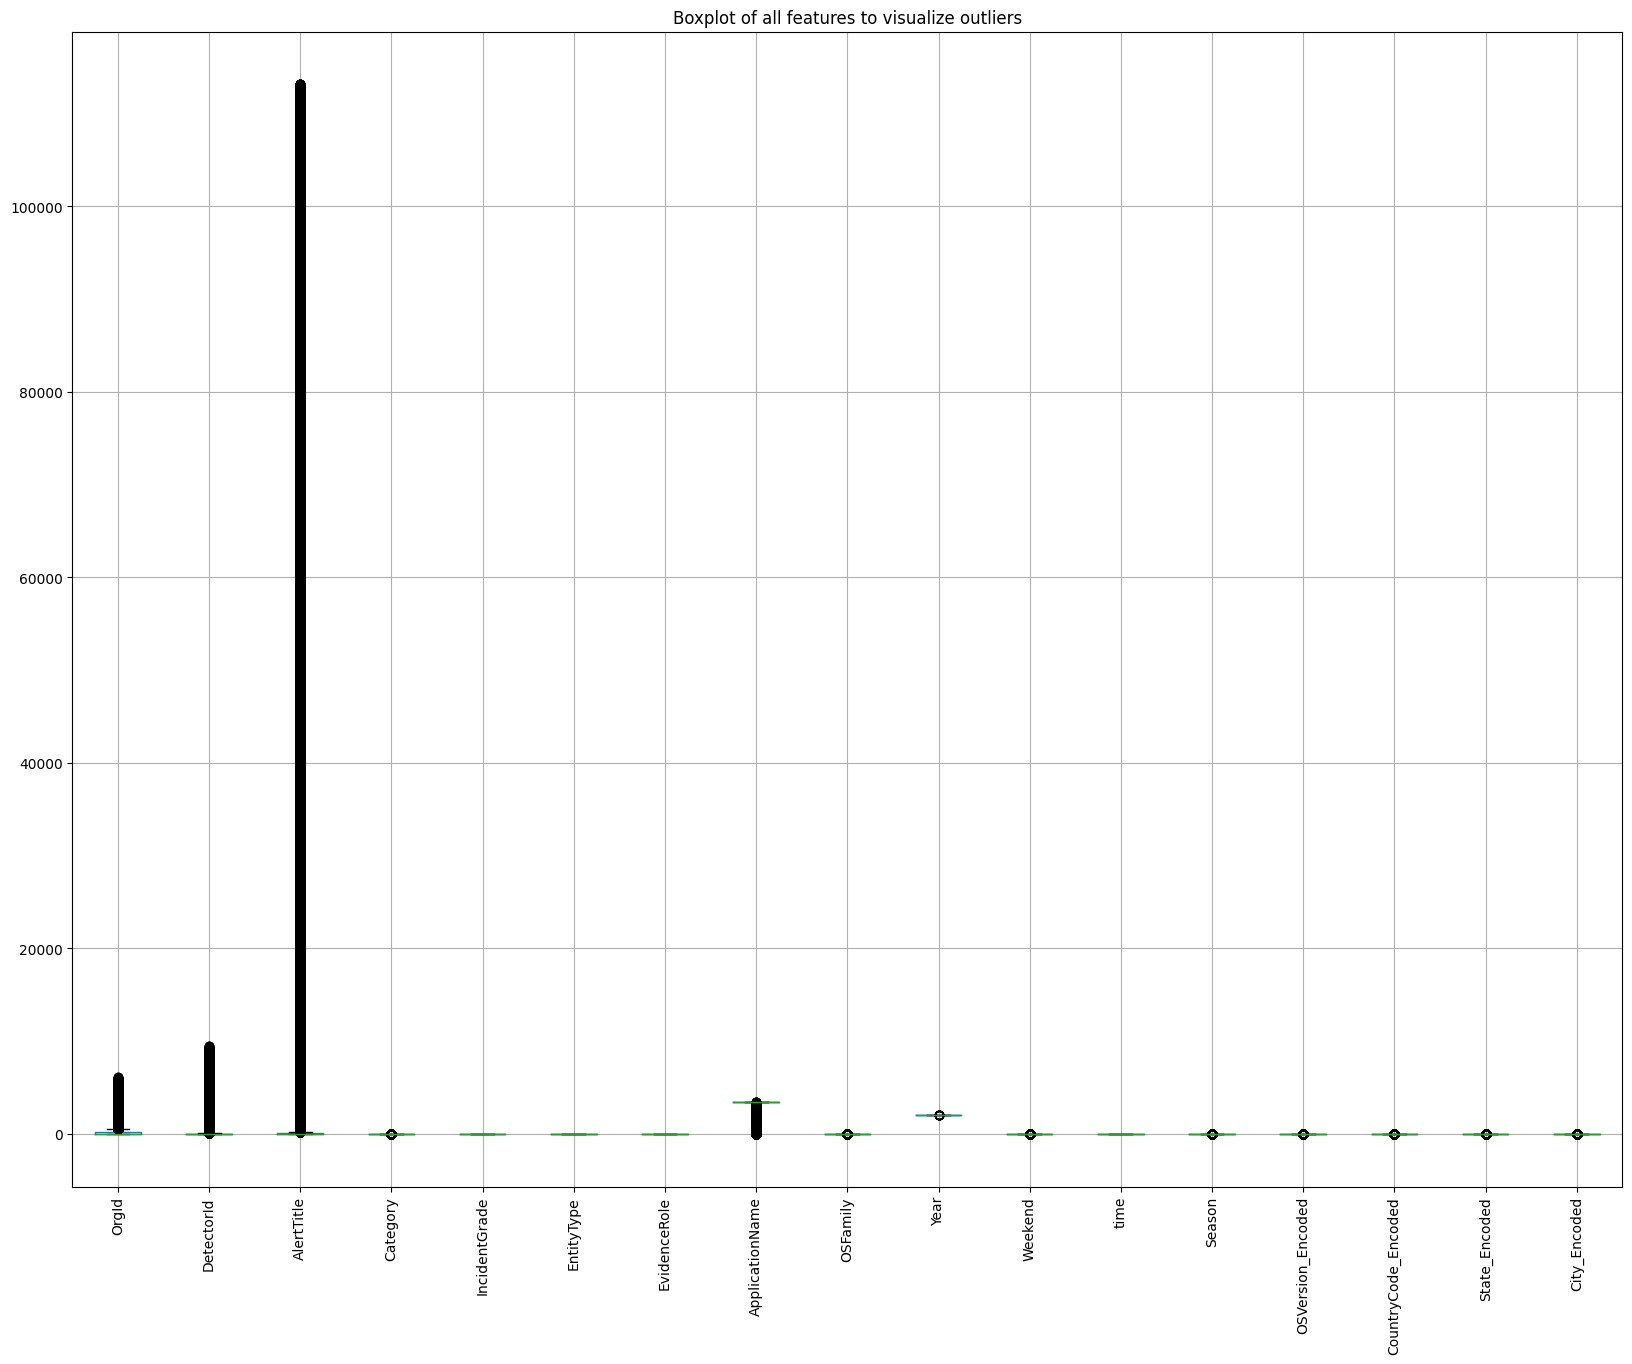

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
df.boxplot(rot=90)
plt.title('Boxplot of all features to visualize outliers')
plt.show()

In [ ]:
def identify_outliers_iqr(data):
    """Identifies outliers using the IQR method."""
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [ ]:
column_name = 'IncidentGrade'
outliers = identify_outliers_iqr(df[column_name])
print(f"Outliers in {column_name}:", outliers)

Outliers in IncidentGrade: Series([], Name: IncidentGrade, dtype: int64)


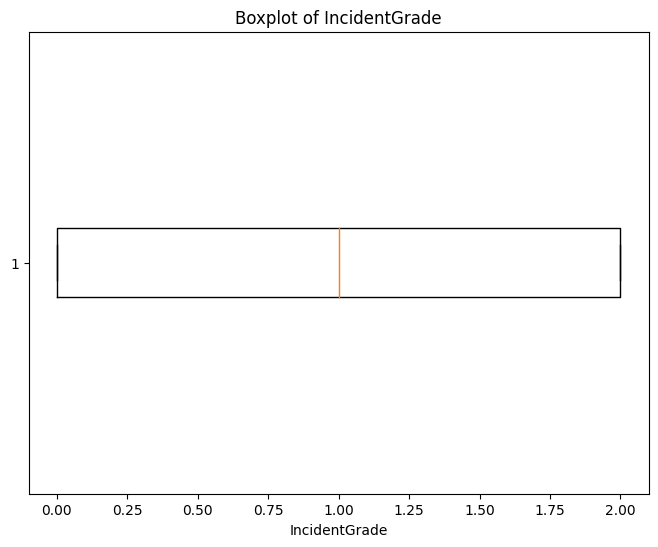

In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['IncidentGrade'], vert=False)
plt.title('Boxplot of IncidentGrade')
plt.xlabel('IncidentGrade')
plt.show()

In [ ]:
for column_name in df.columns:
    if column_name != 'IncidentGrade':
        outliers = identify_outliers_iqr(df[column_name])
        print(f"Outliers in {column_name}:", outliers)

Outliers in OrgId: 2          809
6          522
11         597
15        2119
19         592
          ... 
728430    1294
728439     725
728442    1757
728451     790
728458    1996
Name: OrgId, Length: 81097, dtype: int64
Outliers in DetectorId: 2          423
7          313
14         447
16        1794
19         933
          ... 
728405     100
728411     486
728451    1811
728456     229
728458     782
Name: DetectorId, Length: 117004, dtype: int64
Outliers in AlertTitle: 2           298
7          3919
11          373
13          284
14          473
          ...  
728427    13663
728429     2990
728438    11008
728448     1049
728451     4030
Name: AlertTitle, Length: 145075, dtype: int64
Outliers in Category: 3          1
6          1
8         16
10        16
16         0
          ..
728446     1
728450     1
728451     2
728454    16
728457    16
Name: Category, Length: 188582, dtype: int64
Outliers in EntityType: Series([], Name: EntityType, dtype: int64)
Outliers in Evi

In [ ]:
feature_with_outliers = ('OrgId', 'DetectorId', 'AlertTitle', 'Category',
                          'ApplicationName', 'OSFamily', 'Year',
                          'Weekend', 'Season', 'OSVersion_Encoded', 'CountryCode_Encoded',
                          'State_Encoded', 'City_Encoded')

In [ ]:
for column_name in feature_with_outliers: # Iterate over column names in the tuple
    mean = np.mean(df[column_name])
    std = np.std(df[column_name])
    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std

    # Filter the DataFrame to remove outliers for the current column
new_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [ ]:
new_df

,OrgId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,Year,Weekend,time,Season,OSVersion_Encoded,CountryCode_Encoded,State_Encoded,City_Encoded
0,0,7,6,10,2,13,1,3421,3.0,2024,0,2,1,0.0,5,5,4
1,88,58,43,7,1,27,0,3421,3.0,2024,0,1,1,0.0,0,0,0
2,809,423,298,10,1,26,1,3421,3.0,2024,0,1,1,0.0,0,0,0
3,92,2,2,1,0,26,1,3421,3.0,2024,0,0,1,0.0,0,0,0
4,148,9,74,6,2,27,0,3421,3.0,2024,1,1,1,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728455,0,4,3,10,2,6,1,3421,3.0,2024,0,0,1,0.0,0,0,0
728456,52,229,204,10,0,14,0,3421,3.0,2024,0,1,1,0.0,0,0,0
728457,24,5,21,16,2,13,1,3421,3.0,2024,0,1,1,0.0,0,0,0
728458,1996,782,223,10,2,13,1,3421,3.0,2024,0,1,1,0.0,2,1,1


In [ ]:
len(df)

723782

In [ ]:
len(new_df)

676114

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
m = new_df.drop(columns=['IncidentGrade'])
n = new_df['IncidentGrade']
# Perform Chi-Square test
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(m, n)
# Create DataFrame to view scores and p-values
chi2_scores = pd.DataFrame({
    'Feature': m.columns,
    'Chi2 Score': chi2_selector.scores_,
    'P-value': chi2_selector.pvalues_})
# Sort by Chi2 Score
chi2_scores = chi2_scores.sort_values(by='Chi2 Score', ascending=False)
# Print Chi2 Scores and P-values
print(chi2_scores)
# Select features based on Chi-Square p-values
selected_features_chi = chi2_scores[chi2_scores['P-value'] < 0.05]['Feature'].tolist()
m_selected = m[selected_features_chi]
print("Selected Features:", selected_features_chi)

                Feature    Chi2 Score       P-value
2            AlertTitle  8.305875e+08  0.000000e+00
0                 OrgId  2.056519e+07  0.000000e+00
1            DetectorId  1.954496e+07  0.000000e+00
6       ApplicationName  1.541031e+05  0.000000e+00
13  CountryCode_Encoded  9.373998e+04  0.000000e+00
3              Category  3.878759e+04  0.000000e+00
4            EntityType  3.393504e+04  0.000000e+00
14        State_Encoded  2.646875e+04  0.000000e+00
15         City_Encoded  2.625123e+04  0.000000e+00
9               Weekend  7.065285e+03  0.000000e+00
12    OSVersion_Encoded  4.804291e+03  0.000000e+00
5          EvidenceRole  3.054122e+03  0.000000e+00
7              OSFamily  3.967941e+02  6.874576e-87
10                 time  3.563048e+02  4.259774e-78
11               Season  4.536376e+00  1.034996e-01
8                  Year  3.337889e-08  1.000000e+00
Selected Features: ['AlertTitle', 'OrgId', 'DetectorId', 'ApplicationName', 'CountryCode_Encoded', 'Category', 'Enti

In [ ]:
#ANOVA
import numpy as np
from sklearn.feature_selection import f_classif, SelectKBest
o = new_df.drop(columns=['IncidentGrade'])  # Features
p = new_df['IncidentGrade']
anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(e,f)
p_values = anova_selector.pvalues_
f_scores = anova_selector.scores_
anova_results = pd.DataFrame({
    'Feature': o.columns,
    'F-Score': f_scores,
    'P-Value': p_values})
anova_results = anova_results.sort_values(by='F-Score', ascending=False)
print(anova_results)


                Feature       F-Score        P-Value
13  CountryCode_Encoded  30426.828146   0.000000e+00
15         City_Encoded  23116.966407   0.000000e+00
14        State_Encoded  23012.667981   0.000000e+00
0                 OrgId  17919.269344   0.000000e+00
3              Category  10909.656672   0.000000e+00
2            AlertTitle  10683.141052   0.000000e+00
4            EntityType   7901.428659   0.000000e+00
5          EvidenceRole   7528.023225   0.000000e+00
1            DetectorId   6266.787912   0.000000e+00
9               Weekend   4890.334980   0.000000e+00
7              OSFamily   2910.531662   0.000000e+00
12    OSVersion_Encoded   2301.858356   0.000000e+00
6       ApplicationName    729.765304  2.432657e-317
11               Season    285.585621  1.048705e-124
10                 time    243.404840  2.119117e-106
8                  Year      0.000000   1.000000e+00


In [ ]:
p_value_threshold = 0.05
# Select features with p-value < threshold
selected_features_anova = anova_results[anova_results['P-Value'] < p_value_threshold]

# Sort the selected features by F-Score in descending order
selected_features_anova = selected_features.sort_values(by='F-Score', ascending=False)

# Display the selected features
print(selected_features_anova)

                Feature       F-Score        P-Value
13  CountryCode_Encoded  30426.828146   0.000000e+00
15         City_Encoded  23116.966407   0.000000e+00
14        State_Encoded  23012.667981   0.000000e+00
0                 OrgId  17919.269344   0.000000e+00
3              Category  10909.656672   0.000000e+00
2            AlertTitle  10683.141052   0.000000e+00
4            EntityType   7901.428659   0.000000e+00
5          EvidenceRole   7528.023225   0.000000e+00
1            DetectorId   6266.787912   0.000000e+00
9               Weekend   4890.334980   0.000000e+00
7              OSFamily   2910.531662   0.000000e+00
12    OSVersion_Encoded   2301.858356   0.000000e+00
6       ApplicationName    729.765304  2.432657e-317
11               Season    285.585621  1.048705e-124
10                 time    243.404840  2.119117e-106


In [ ]:
#drop year as both anova and chi square suggest
new_df.drop("Year",axis=1,inplace=True)

<ipython-input-75-d4c40ea61c6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop("Year",axis=1,inplace=True)


In [ ]:
new_df.describe()

,OrgId,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,Weekend,time,Season,OSVersion_Encoded,CountryCode_Encoded,State_Encoded,City_Encoded
count,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000,676114.000000
mean,211.467866,115.836998,3374.476201,9.180564,0.945107,17.251157,0.521915,3307.853325,2.913735,0.159918,0.877330,0.989311,0.031737,0.129648,0.042363,0.040001
std,409.442249,473.497956,12574.372754,4.109669,0.898598,7.687222,0.499520,610.500133,0.499993,0.366531,0.829093,0.103522,0.204094,0.701331,0.334403,0.300692
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,2.000000,2.000000,7.000000,0.000000,13.000000,0.000000,3421.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,59.000000,5.000000,6.000000,10.000000,1.000000,16.000000,1.000000,3421.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,221.000000,36.000000,126.000000,10.000000,2.000000,26.000000,1.000000,3421.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,6144.000000,9487.000000,113168.000000,18.000000,2.000000,27.000000,1.000000,3421.000000,3.000000,1.000000,2.000000,2.000000,5.000000,5.000000,5.000000,4.000000


In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/GUIDE_Test.csv", low_memory=False, nrows=1000000)

In [ ]:
df1.head()

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City,Usage
0,1245540519230,657,11767,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Private
1,1400159342154,3,91158,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,0,0,NaN,Suspicious,Suspicious,242,1445,10630,Public
2,1279900255923,145,32247,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,...,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630,Public
3,60129547292,222,15294,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,...,NaN,5,66,NaN,NaN,NaN,242,1445,10630,Public
4,515396080539,363,7615,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,...,Suspicious,5,66,NaN,NaN,NaN,242,1445,10630,Public


In [ ]:
#Removing because unique identifiers, Keys, Hashes and Encrypted Data, File and Resource Identifiers,  Inconsistent or Redundant Features
df1 = df1.drop(columns=['Id', 'IncidentId', 'AlertId', 'DeviceId', 'Sha256',
                      'IpAddress', 'Url',
                      'AccountSid', 'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
                      'NetworkMessageId', 'RegistryKey', 'RegistryValueName', 'RegistryValueData',
                      'ApplicationId', 'OAuthApplicationId', 'FileName', 'FolderPath', 'ResourceIdName','Usage'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   OrgId              1000000 non-null  int64  
 1   Timestamp          1000000 non-null  object 
 2   DetectorId         1000000 non-null  int64  
 3   AlertTitle         1000000 non-null  int64  
 4   Category           1000000 non-null  object 
 5   MitreTechniques    444430 non-null   object 
 6   IncidentGrade      1000000 non-null  object 
 7   ActionGrouped      486 non-null      object 
 8   ActionGranular     486 non-null      object 
 9   EntityType         1000000 non-null  object 
 10  EvidenceRole       1000000 non-null  object 
 11  EmailClusterId     10077 non-null    float64
 12  ApplicationName    1000000 non-null  int64  
 13  ThreatFamily       7508 non-null     object 
 14  ResourceType       719 non-null      object 
 15  Roles              26415 non-null

In [ ]:
df1.duplicated().sum()

300841

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df1.reset_index(inplace=True)

In [ ]:
percent_missing = df1.isnull().sum() * 100 / len(df1)
missing_value_df1 = pd.DataFrame({'column_name': df1.columns, 'percent_missing': percent_missing})
missing_value_df1.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df1

,column_name,percent_missing
ActionGrouped,ActionGrouped,99.931489
ActionGranular,ActionGranular,99.931489
ResourceType,ResourceType,99.904171
ThreatFamily,ThreatFamily,99.372675
EmailClusterId,EmailClusterId,98.596171
Roles,Roles,97.781764
AntispamDirection,AntispamDirection,97.425764
SuspicionLevel,SuspicionLevel,80.618858
LastVerdict,LastVerdict,70.133546
MitreTechniques,MitreTechniques,53.651601


In [ ]:
#dropping null values _more than 50 percentage
for i in df1.columns:
    if (df1[i].isnull().sum()/len(df1))*100>=50:
        df1.drop(i,axis=1,inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699159 entries, 0 to 699158
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   index            699159 non-null  int64 
 1   OrgId            699159 non-null  int64 
 2   Timestamp        699159 non-null  object
 3   DetectorId       699159 non-null  int64 
 4   AlertTitle       699159 non-null  int64 
 5   Category         699159 non-null  object
 6   IncidentGrade    699159 non-null  object
 7   EntityType       699159 non-null  object
 8   EvidenceRole     699159 non-null  object
 9   ApplicationName  699159 non-null  int64 
 10  OSFamily         699159 non-null  int64 
 11  OSVersion        699159 non-null  int64 
 12  CountryCode      699159 non-null  int64 
 13  State            699159 non-null  int64 
 14  City             699159 non-null  int64 
dtypes: int64(10), object(5)
memory usage: 80.0+ MB


In [ ]:
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
# Extract features from Timestamp
df1['Year'] = df1['Timestamp'].dt.year
df1['Month'] = df1['Timestamp'].dt.month
df1['Hour'] = df1['Timestamp'].dt.hour
df1['DayOfWeek'] = df1['Timestamp'].dt.dayofweek

In [ ]:
df1.head()

,index,OrgId,Timestamp,DetectorId,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,ApplicationName,OSFamily,OSVersion,CountryCode,State,City,Year,Month,Hour,DayOfWeek
0,0,657,2024-06-04 22:56:27+00:00,524,563,LateralMovement,BenignPositive,User,Impacted,3421,5,66,242,1445,10630,2024,6,22,1
1,1,3,2024-06-03 12:58:26+00:00,2,2,CommandAndControl,BenignPositive,Machine,Impacted,3421,0,0,242,1445,10630,2024,6,12,0
2,2,145,2024-06-08 03:20:49+00:00,2932,10807,LateralMovement,BenignPositive,Process,Related,3421,5,66,242,1445,10630,2024,6,3,5
3,3,222,2024-06-12 12:07:31+00:00,0,0,InitialAccess,FalsePositive,CloudLogonSession,Related,3421,5,66,242,1445,10630,2024,6,12,2
4,4,363,2024-06-06 17:42:05+00:00,27,18,Discovery,BenignPositive,User,Impacted,3421,5,66,242,1445,10630,2024,6,17,3


In [ ]:
df1['Weekend'] = df1['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)
#nighttime as 1 _BusinessHours as 0
df1['time'] = df1['Hour'].apply(lambda x: 1 if (x >= 22 or x <= 5) else 0 if (x >= 9 and x <= 17) else 2)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df1['Season'] = df1['Month'].apply(get_season)
df1.drop(["Timestamp","DayOfWeek","Hour","Month"],axis=1,inplace=True)

In [ ]:
df1.drop("index",axis=1,inplace=True)

In [ ]:
# Create a mapping dictionary
top_5 = df1['OSVersion'].value_counts().nlargest(5)
other_counts = df1['OSVersion'].value_counts().sum() - top_5.sum()
top_5['Others'] = other_counts
print(top_5)
top_5_countries = df1['OSVersion'].value_counts().nlargest(5).index.tolist()
mapping = {country: i for i, country in enumerate(top_5_countries)}
mapping['Others'] = len(top_5_countries)  # Assign a numerical value for 'Others'
# Apply the mapping to the 'CountryCode' column
df1['OSVersion_Encoded'] = df1['OSVersion'].apply(lambda x: mapping.get(x, mapping['Others']))

OSVersion
66        679276
0          19181
1            167
2            165
3            107
Others       263
Name: count, dtype: int64


In [ ]:
top_5 = df1['CountryCode'].value_counts().nlargest(5)
other_counts = df1['CountryCode'].value_counts().sum() - top_5.sum()
top_5['Others'] = other_counts
print(top_5)
# Create a mapping dictionary
top_5_countries = df1['CountryCode'].value_counts().nlargest(5).index.tolist()
mapping = {country: i for i, country in enumerate(top_5_countries)}
mapping['Others'] = len(top_5_countries)
# Apply the mapping to the 'CountryCode' column
df1['CountryCode_Encoded'] = df1['CountryCode'].apply(lambda x: mapping.get(x, mapping['Others']))

CountryCode
242       616982
0          19015
1          10599
2           6566
3           4634
Others     41363
Name: count, dtype: int64


In [ ]:
top_5 = df1['State'].value_counts().nlargest(5)
other_counts = df1['State'].value_counts().sum() - top_5.sum()
top_5['Others'] = other_counts
print(top_5)
top_5_countries = df1['State'].value_counts().nlargest(5).index.tolist()
mapping = {country: i for i, country in enumerate(top_5_countries)}
mapping['Others'] = len(top_5_countries)
# Apply the mapping to the 'CountryCode' column
df1['State_Encoded'] = df1['State'].apply(lambda x: mapping.get(x, mapping['Others']))

State
1445      630142
0          10285
1           4612
2           3658
3           2457
Others     48005
Name: count, dtype: int64


In [ ]:
top_5 = df1['City'].value_counts().nlargest(5)
other_counts = df1['City'].value_counts().sum() - top_5.sum()
top_5['Others'] = other_counts
print(top_5)
top_5_countries = df1['City'].value_counts().nlargest(5).index.tolist()
mapping = {country: i for i, country in enumerate(top_5_countries)}
mapping['Others'] = len(top_5_countries)
# Apply the mapping to the 'CountryCode' column
df1['City_Encoded'] = df1['City'].apply(lambda x: mapping.get(x, mapping['Others']))

City
10630     630038
0          10246
1           2618
2           2453
3           1741
Others     52063
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ['Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
                     "CountryCode_Encoded", "City_Encoded", "State_Encoded","Season"]
label_encoder = LabelEncoder()
for i in columns:
    df1[i] = label_encoder.fit_transform(df1[i])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in ["OSVersion_Encoded", "OSFamily"]:
    df1[i] = enc.fit_transform(df1[[i]])  #follows order
df1=df1.drop(columns=["OSVersion", "CountryCode", "State", "City"],axis=1,inplace=False)

In [ ]:
df1.IncidentGrade.value_counts()

,count
IncidentGrade,
2,303090
0,267401
1,128668


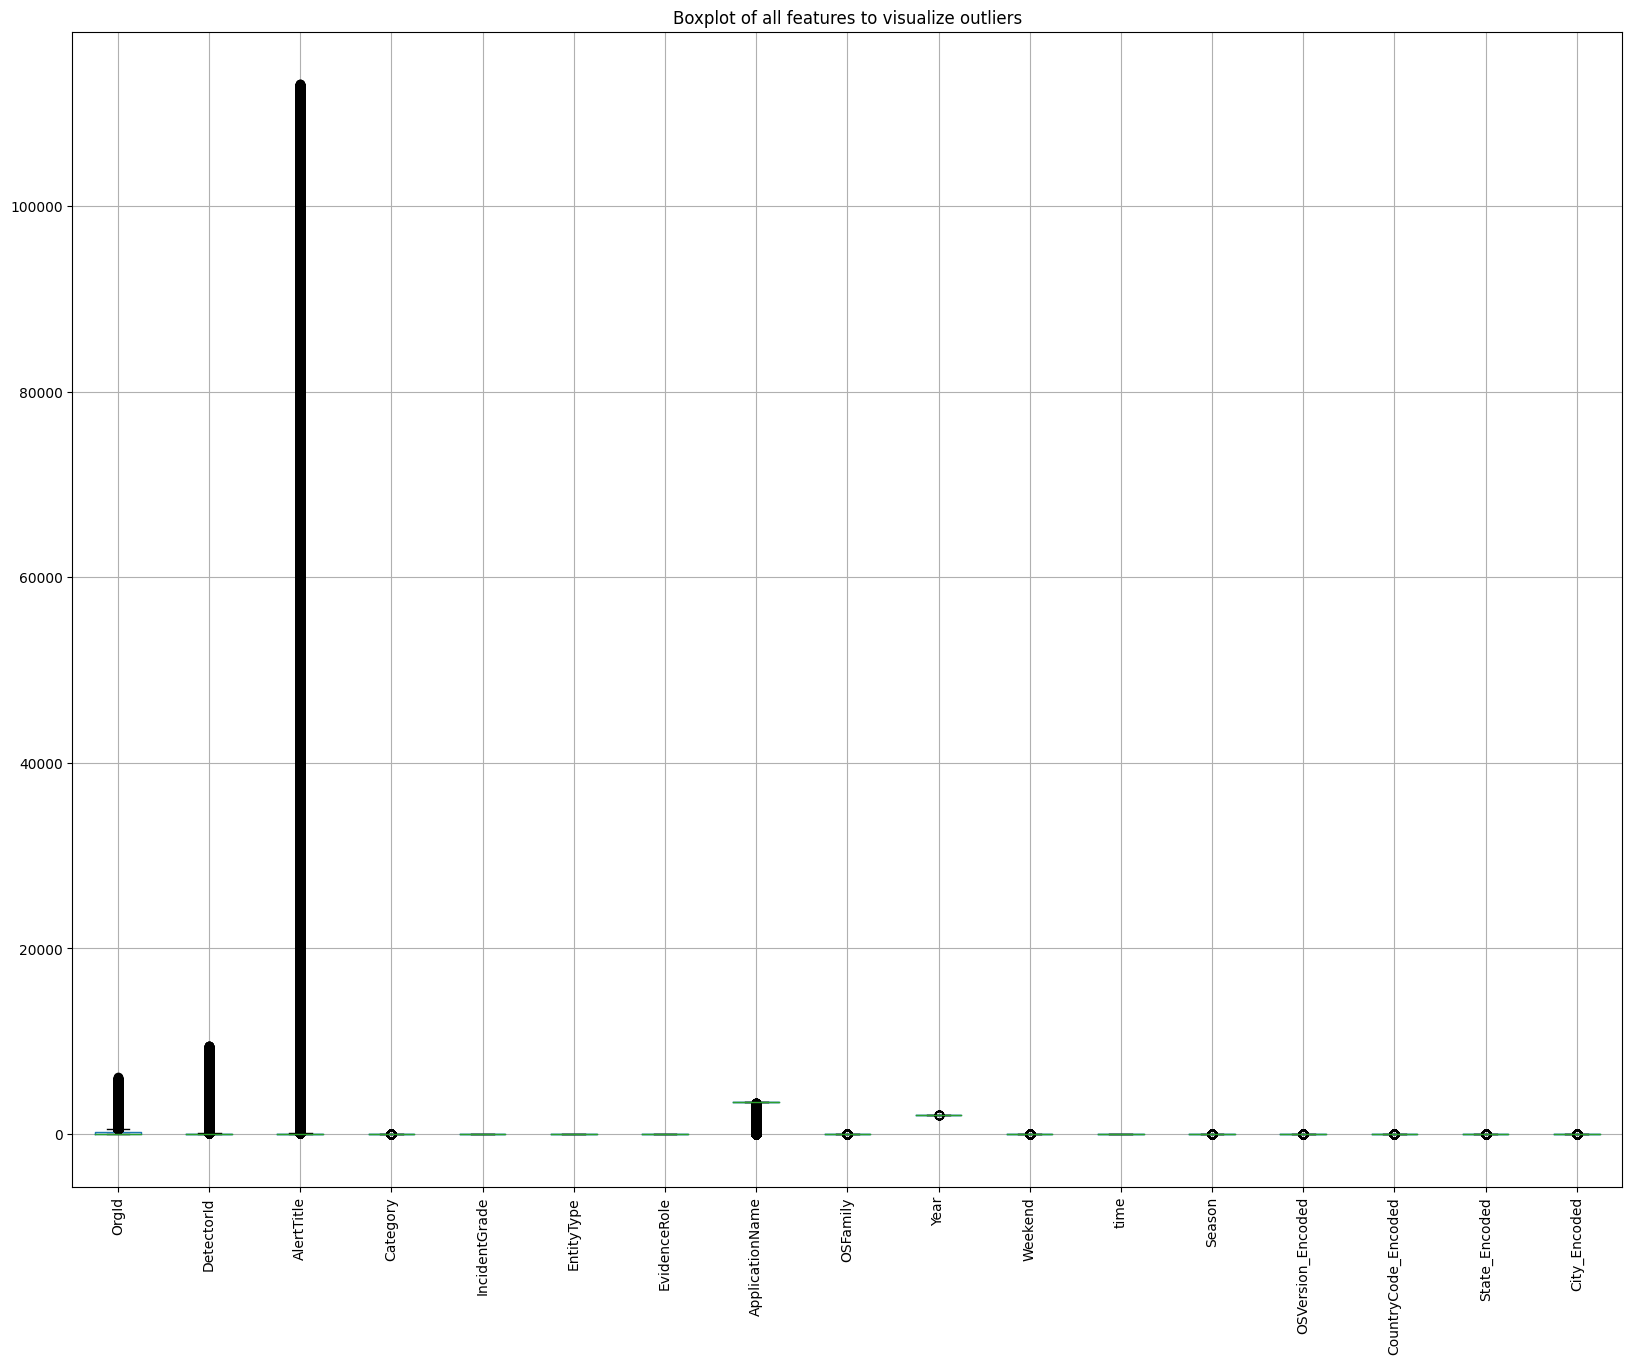

In [ ]:
plt.figure(figsize=(20, 15))
df1.boxplot(rot=90)
plt.title('Boxplot of all features to visualize outliers')
plt.show()

In [ ]:
def identify_outliers_iqr(data):
    """Identifies outliers using the IQR method."""
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

In [ ]:
column_name = 'IncidentGrade'
outliers = identify_outliers_iqr(df1[column_name])
print(f"Outliers in {column_name}:", outliers)

Outliers in IncidentGrade: Series([], Name: IncidentGrade, dtype: int64)


In [ ]:
for column_name in df1.columns:
    if column_name != 'IncidentGrade':
        outliers = identify_outliers_iqr(df1[column_name])
        print(f"Outliers in {column_name}:", outliers)

Outliers in OrgId: 0          657
10        1657
21         657
26        1236
40        1012
          ... 
699112    1667
699131    4913
699134    1444
699140     688
699151    1624
Name: OrgId, Length: 76015, dtype: int64
Outliers in DetectorId: 0          524
2         2932
9           72
11        1143
14         363
          ... 
699135     421
699139     240
699140     347
699148      81
699154     115
Name: DetectorId, Length: 115033, dtype: int64
Outliers in AlertTitle: 0           563
2         10807
7          1265
8           528
11         2083
          ...  
699131      206
699139      222
699140      356
699142    37290
699148      802
Name: AlertTitle, Length: 141613, dtype: int64
Outliers in Category: 1          1
6         16
11         2
20        16
25        16
          ..
699144    16
699147     1
699148    16
699153     1
699156    16
Name: Category, Length: 184017, dtype: int64
Outliers in EntityType: Series([], Name: EntityType, dtype: int64)
Outliers in Evi

In [ ]:
df1.columns

Index(['OrgId', 'DetectorId', 'AlertTitle', 'Category', 'IncidentGrade',
       'EntityType', 'EvidenceRole', 'ApplicationName', 'OSFamily', 'Year',
       'Weekend', 'time', 'Season', 'OSVersion_Encoded', 'CountryCode_Encoded',
       'State_Encoded', 'City_Encoded'],
      dtype='object')

In [ ]:
feature_with_outliers = ('OrgId', 'DetectorId', 'AlertTitle', 'Category',
                        'ApplicationName', 'OSFamily', 'Year',
                        'Weekend','Season', 'OSVersion_Encoded',
                        'CountryCode_Encoded', 'State_Encoded', 'City_Encoded')

In [ ]:
import numpy as np
for column_name in feature_with_outliers: # Iterate over column names in the tuple
    mean = np.mean(df1[column_name])
    std = np.std(df1[column_name])
    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std

    # Filter the DataFrame to remove outliers for the current column
new_df1 = df1[(df1[column_name] >= lower_bound) & (df1[column_name] <= upper_bound)]

In [ ]:
len(df1)

699159

In [ ]:
len(new_df1)

647096

In [ ]:
#Droppning year as both anova and chi square suggest
new_df1.drop("Year",axis=1,inplace=True)

<ipython-input-111-71e4f056a2f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df1.drop("Year",axis=1,inplace=True)


In [ ]:
new_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 647096 entries, 0 to 699158
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   OrgId                647096 non-null  int64  
 1   DetectorId           647096 non-null  int64  
 2   AlertTitle           647096 non-null  int64  
 3   Category             647096 non-null  int64  
 4   IncidentGrade        647096 non-null  int64  
 5   EntityType           647096 non-null  int64  
 6   EvidenceRole         647096 non-null  int64  
 7   ApplicationName      647096 non-null  int64  
 8   OSFamily             647096 non-null  float64
 9   Weekend              647096 non-null  int64  
 10  time                 647096 non-null  int64  
 11  Season               647096 non-null  int64  
 12  OSVersion_Encoded    647096 non-null  float64
 13  CountryCode_Encoded  647096 non-null  int64  
 14  State_Encoded        647096 non-null  int64  
 15  City_Encoded         6

In [ ]:
from sklearn.model_selection import train_test_split
x = new_df.drop('IncidentGrade', axis=1)
y = new_df['IncidentGrade']

In [ ]:
x.shape,y.shape

((676114, 15), (676114,))

In [ ]:
# Stratified split to handle potential imbalance
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

print("Training set shape:", x_train.shape, y_train.shape)
print("Validation set shape:", x_val.shape, y_val.shape)

Training set shape: (540891, 15) (540891,)
Validation set shape: (135223, 15) (135223,)


In [ ]:
x_test = new_df1.drop('IncidentGrade', axis=1)
y_test = new_df1['IncidentGrade']

In [ ]:
x_test.shape,y_test.shape

((647096, 15), (647096,))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
# 1. Create Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9038875220987304

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93    266309
           1       0.84      0.80      0.82    119371
           2       0.90      0.94      0.92    261416

    accuracy                           0.90    647096
   macro avg       0.89      0.88      0.89    647096
weighted avg       0.90      0.90      0.90    647096



In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust n_estimators and random_state as needed

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(x_test)
# 4. Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.875701596053754

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90    266309
           1       0.84      0.69      0.76    119371
           2       0.87      0.93      0.90    261416

    accuracy                           0.88    647096
   macro avg       0.87      0.84      0.85    647096
weighted avg       0.87      0.88      0.87    647096



In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7958463659178855
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85    266309
           1       0.98      0.28      0.43    119371
           2       0.75      0.95      0.84    261416

    accuracy                           0.80    647096
   macro avg       0.85      0.70      0.71    647096
weighted avg       0.82      0.80      0.77    647096



In [ ]:
from imblearn.over_sampling import SMOTE
# Check for Class Imbalance
class_counts = pd.Series(y_train).value_counts()
print("Class Distribution:\n", class_counts)

majority_count = class_counts.max()
minority_count = class_counts.min()
imbalance_ratio = majority_count / minority_count
print("Imbalance Ratio:", imbalance_ratio)

# Handle Imbalance (if needed) - Adjust threshold as per your problem
if imbalance_ratio > 1.5:
    print("\nApplying SMOTE to handle class imbalance...")
    smote = SMOTE(random_state=42)
    x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
    print("Resampled Class Distribution:\n", pd.Series(y_train_resampled).value_counts())
else:
    print("\nNo significant class imbalance detected.")

Class Distribution:
 IncidentGrade
0    234039
2    204348
1    102504
Name: count, dtype: int64
Imbalance Ratio: 2.2832182158745025

Applying SMOTE to handle class imbalance...
Resampled Class Distribution:
 IncidentGrade
0    234039
1    234039
2    234039
Name: count, dtype: int64


In [ ]:
dt_model = DecisionTreeClassifier(random_state=42, criterion='entropy',
                                            max_depth=None,
                                            max_features=None, min_samples_leaf=1, min_samples_split=2)
dt_model.fit(x_train_resampled, y_train_resampled)

# Evaluate on Original Test Data
y_pred = dt_model.predict(x_test)

print("\nTest Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))


Test Set Accuracy: 0.8973799868952984

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92    266309
           1       0.76      0.84      0.79    119371
           2       0.92      0.92      0.92    261416

    accuracy                           0.90    647096
   macro avg       0.87      0.89      0.88    647096
weighted avg       0.90      0.90      0.90    647096



In [ ]:
#hyper tuned decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
# Define the parameter grid for DecisionTreeClassifier
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]}

# Initialize and fit GridSearchCV for DecisionTreeClassifier
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt,
                              cv=5,
                              scoring='accuracy',
                              verbose=2,
                              n_jobs=-1)
grid_search_dt.fit(x_train_resampled, y_train_resampled)
best_params_dt = grid_search_dt.best_params_
print("Best Hyperparameters for DecisionTreeClassifier:", best_params_dt)
best_model_dt = grid_search_dt.best_estimator_
y_pred_dt = best_model_dt.predict(x_test)
print("Accuracy for DecisionTreeClassifier:", accuracy_score(y_test, y_pred_dt))
print("Classification Report for DecisionTreeClassifier:\n", classification_report(y_test, y_pred_dt))

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best Hyperparameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy for DecisionTreeClassifier: 0.8973799868952984
Classification Report for DecisionTreeClassifier:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92    266309
           1       0.76      0.84      0.79    119371
           2       0.92      0.92      0.92    261416

    accuracy                           0.90    647096
   macro avg       0.87      0.89      0.88    647096
weighted avg       0.90      0.90      0.90    647096



In [ ]:
#cross validation score & Feature importance
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(dt_model, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())
# Feature Importance
# 1. Model-Specific Feature Importance
print("Feature Importance (Decision Tree):")
for feature, importance in zip(x_train.columns, dt_model.feature_importances_):
    print(f"{feature}: {importance}")

Cross-Validation Scores: [0.94739061 0.95305532 0.95179075 0.95131006 0.9513097 ]
Average Accuracy: 0.9509712864079308
Feature Importance (Decision Tree):
OrgId: 0.6734444379318151
DetectorId: 0.09317198348599527
AlertTitle: 0.14236279694691575
Category: 0.05477751133627536
EntityType: 0.01173242598589866
EvidenceRole: 0.002625962819806563
ApplicationName: 0.0012892635959487859
OSFamily: 0.0003832132411019468
Weekend: 0.006265124477640235
time: 0.01138701512557811
Season: 0.0007769860434964224
OSVersion_Encoded: 0.00041718575225569647
CountryCode_Encoded: 0.0010033312438864203
State_Encoded: 0.00017765728209042956
City_Encoded: 0.00018510473129543467


In [ ]:
# Error Analysis
y_pred = dt_model.predict(x_test)
misclassified_indices = y_test != y_pred
misclassified_samples = x_test[misclassified_indices]
print("\nMisclassified Samples:")
print(misclassified_samples)


Misclassified Samples:
        OrgId  DetectorId  AlertTitle  Category  EntityType  EvidenceRole  \
2         145        2932       10807        11          19             1   
11        103        1143        2083         2          10             1   
19        413           7           6        10           5             1   
22          7          22          10         9          10             1   
25         24           5          50        16          10             1   
...       ...         ...         ...       ...         ...           ...   
699106   1247        1660        3629        10           1             0   
699131   4913          31         206        12          23             1   
699134   1444          33          22        10          13             1   
699136    114           3           4        16          11             0   
699157    419           6           5        10          12             1   

        ApplicationName  OSFamily  Weekend  time  S

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
# Calculate metrics
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.92    266309
           1       0.76      0.84      0.79    119371
           2       0.92      0.92      0.92    261416

    accuracy                           0.90    647096
   macro avg       0.87      0.89      0.88    647096
weighted avg       0.90      0.90      0.90    647096

Confusion Matrix:
 [[239194  18724   8391]
 [  6962 100089  12320]
 [  6329  13679 241408]]
